https://www.kaggle.com/code/vikramb/mobile-price-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## EDA

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
len(df['battery_power'].unique())

1094

In [8]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

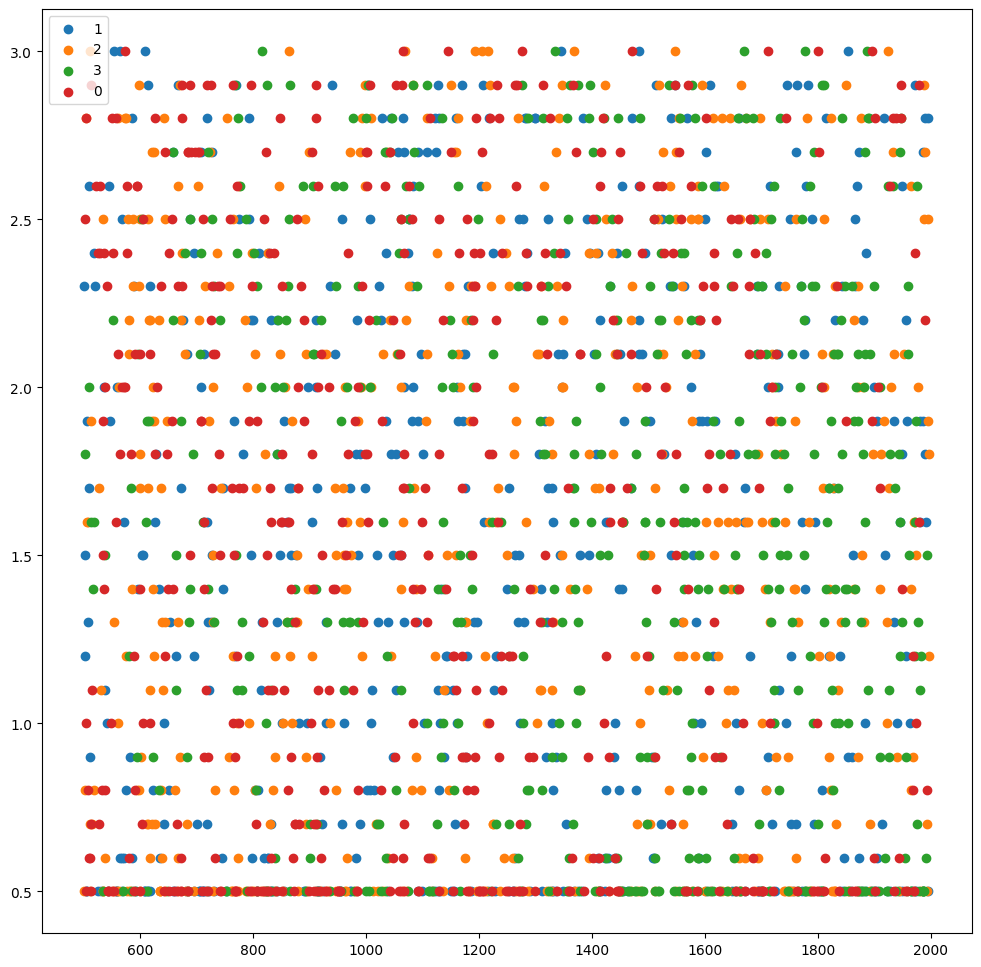

In [9]:
plt.figure(figsize=(12,12))
for i in df['price_range'].unique():
    category = df[df['price_range'] == i]
    plt.scatter(category['battery_power'],category['clock_speed'],label=i)
    plt.legend()

In [9]:
plt.figure(figsize=(12,12))
sns.pairplot(df,hue='price_range')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_15228\2503391282.py", line 2, in <module>
    sns.pairplot(df,hue='price_range')
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py", line 2096, in pairplot
    grid = PairGrid(data, vars=vars, x_vars=x_vars, y_vars=y_vars, hue=hue,
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1244, in __init__
    axes = fig.subplots(len(y_vars), len(x_vars),
  File "C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\matplotlib\figure.py", line 894, in subplots
 

TypeError: object of type 'NoneType' has no len()

Error in callback <function _draw_all_if_interactive at 0x000002BC0FE43E50> (for post_execute):


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

Error in callback <function flush_figures at 0x000002BC12300C10> (for post_execute):


KeyboardInterrupt: 

## spliting the data

In [10]:
from sklearn.model_selection import train_test_split

ERROR! Session/line number was not unique in database. History logging moved to new session 552


In [11]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(1600, 20)

In [13]:
x_test.shape

(400, 20)

In [14]:
y_train.shape

(1600,)

In [15]:
y_test.shape

(400,)

**maybe knn will perform better here**

Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred,y_test))

0.835


K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
pred = knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.9425


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Applying adaboost hyper parameter tuning using gridsearchcv

estimator object, default=None : The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
New in version 1.2: base_estimator was renamed to estimator.

n_estimators int, default=50 : The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

learning_rate float, default=1.0 : Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’ : If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

random_state int, RandomState instance or None, default=None : Controls the random seed given at each estimator at each boosting iteration. Thus, it is only used when estimator exposes a random_state. Pass an int for reproducible output across multiple function calls. See Glossary.

base_estimator object, default=None : The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [35]:
params ={
    'n_estimators':[100,200,300,400,500],
    'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,1.0,2.0,3.0],
    'algorithm':['SAMME','SAMME.R'],
}
##estimator if non decision tree is used

In [36]:
ab = AdaBoostClassifier()
gs_ab = GridSearchCV( ab,param_grid=params,cv=5,scoring ='accuracy',verbose=3)

In [37]:
gs_ab.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=100;, score=0.487 total time=   0.2s
[CV 2/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=100;, score=0.487 total time=   0.2s
[CV 3/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=100;, score=0.491 total time=   0.2s
[CV 4/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=100;, score=0.484 total time=   0.2s
[CV 5/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=100;, score=0.491 total time=   0.2s
[CV 1/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.5s
[CV 2/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.5s
[CV 3/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=200;, score=0.491 total time=   0.5s
[CV 4/5] END algorithm=SAMME, learning_rate=1e-05, n_estimators=200;, score=0.484 total time=   0.5s
[CV 5/5] END algorithm=SAMME,

[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=200;, score=0.694 total time=   0.3s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=200;, score=0.669 total time=   0.3s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=200;, score=0.703 total time=   0.3s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=200;, score=0.709 total time=   0.3s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=300;, score=0.744 total time=   0.5s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=300;, score=0.741 total time=   0.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=300;, score=0.697 total time=   0.4s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=300;, score=0.703 total time=   0.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=300;, score=0.738 total time=   0.4s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=400;, score=0.762 total time=   0.7s


[CV 5/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=300;, score=0.566 total time=   0.5s
[CV 1/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=400;, score=0.525 total time=   0.7s
[CV 2/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=400;, score=0.613 total time=   0.7s
[CV 3/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=400;, score=0.484 total time=   0.7s
[CV 4/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=400;, score=0.591 total time=   0.7s
[CV 5/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=400;, score=0.519 total time=   0.6s
[CV 1/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=500;, score=0.497 total time=   0.8s
[CV 2/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=500;, score=0.572 total time=   1.0s
[CV 3/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=500;, score=0.497 total time=   1.0s
[CV 4/5] END algorithm=SAMME, learning_rate=2.0, n_estimators=500;, score=0.581 total time=   0.9s
[CV 5/5] E

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 1/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=300;, score=0.603 total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 2/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=300;, score=0.616 total time=   0.5s
[CV 3/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=300;, score=0.669 total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 4/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=300;, score=0.453 total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 5/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=300;, score=0.253 total time=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 1/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=400;, score=0.662 total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 2/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=400;, score=0.691 total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 3/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=400;, score=0.584 total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 4/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=400;, score=0.509 total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 5/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=400;, score=0.253 total time=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 1/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=500;, score=0.762 total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 2/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=500;, score=0.688 total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 3/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=500;, score=0.537 total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 4/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=500;, score=0.522 total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\skl

[CV 5/5] END algorithm=SAMME, learning_rate=3.0, n_estimators=500;, score=0.253 total time=   0.3s
[CV 1/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100;, score=0.487 total time=   0.1s
[CV 2/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100;, score=0.487 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100;, score=0.491 total time=   0.1s
[CV 4/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100;, score=0.484 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100;, score=0.491 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.3s
[CV 2/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.3s
[CV 3/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=200;, score=0.491 total time=   0.3s
[CV 4/5] END algorithm=SAMME.R, learning_rate=1e-05, n_estimators=200;, score

[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.406 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.447 total time=   0.3s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.441 total time=   0.3s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.434 total time=   0.3s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.438 total time=   0.3s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.406 total time=   0.4s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=300;, score=0.447 total time=   0.5s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=300;, score=0.438 total time=   0.5s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=300;, score=0.434 total time=   0.5s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=300;, score=0.438

[CV 1/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=300;, score=0.516 total time=   0.6s
[CV 2/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=300;, score=0.306 total time=   0.6s
[CV 3/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=300;, score=0.525 total time=   0.6s
[CV 4/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=300;, score=0.422 total time=   0.7s
[CV 5/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=300;, score=0.584 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=400;, score=0.503 total time=   0.8s
[CV 2/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=400;, score=0.306 total time=   0.8s
[CV 3/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=400;, score=0.503 total time=   0.8s
[CV 4/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=400;, score=0.528 total time=   0.9s
[CV 5/5] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=400;, score=0.434 total tim

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                           2.0, 3.0],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=3)

In [38]:
print(gs_ab.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 400}


In [40]:
print(gs_ab.best_score_)

0.7543750000000001


## Applying adaboost hyper parameter tuning with KNearestNeighbors using gridsearchcv

In [41]:
accuracy=[]
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    pred = knn.predict(x_test)
    print("neighbors ",i," = ",accuracy_score(pred,y_test))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

neighbors  1  =  0.9275
neighbors  3  =  0.9275
neighbors  5  =  0.9425
neighbors  7  =  0.955
neighbors  9  =  0.955
neighbors  11  =  0.95
neighbors  13  =  0.95
neighbors  15  =  0.945
neighbors  17  =  0.9525
neighbors  19  =  0.9475


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [58]:
# knn=KNeighborsClassifier(n_neighbors=7)
# ab = AdaBoostClassifier(base_estimator=knn,algorithm='SAMME')
# ab.fit(x_train , y_train)
# pred = ab.predict(x_test)
# print(accuracy_score(pred,y_test))

# # KNeighborsClassifier doesn't support sample_weigh in AdaBoost so score it will display 'nan' if we use knn as an base estimator in AdaBoost

In [1]:
params ={
    'n_estimators':[100,200,300,400,500],
    'base_estimator':[knn,None],
    'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,1.0],
    'algorithm':['SAMME','SAMME.R']
}

NameError: name 'knn' is not defined

In [46]:
ab = AdaBoostClassifier()
gs_ab = GridSearchCV( ab,param_grid=params,cv=5,scoring ='accuracy',verbose=3)

In [47]:
gs_ab.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1e-05, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, b

[CV 5/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=1.0, n_est

[CV 1/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=200;, score=0.487 total time=   0.3s
[CV 2/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=200;, score=0.487 total time=   0.3s
[CV 3/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=200;, score=0.491 total time=   0.3s
[CV 4/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=200;, score=0.484 total time=   0.3s
[CV 5/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=200;, score=0.491 total time=   0.3s
[CV 1/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=300;, score=0.487 total time=   0.5s
[CV 2/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=300;, score=0.487 total time=   0.4s
[CV 3/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.0001, n_estimators=300;, score=0.491 total time=   0.5s
[CV 4/5] END alg

[CV 4/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.01, n_estimators=500;, score=0.703 total time=   0.8s
[CV 5/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.01, n_estimators=500;, score=0.734 total time=   0.8s
[CV 1/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=100;, score=0.769 total time=   0.1s
[CV 2/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=100;, score=0.753 total time=   0.1s
[CV 3/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=100;, score=0.719 total time=   0.1s
[CV 4/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=100;, score=0.703 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END algorithm=SAMME, base_estimator=None, learning_rate=0.1, n_estimators=200;, score=0.766 total time=   0.3s
[CV 2/5] END algorithm=SAMME, base_est

[CV 4/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.01, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.01, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning_rate=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=KNeighborsClassifier(n_neighbors=7), learning

[CV 4/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=100;, score=0.484 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=100;, score=0.491 total time=   0.2s
[CV 1/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.3s
[CV 2/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=200;, score=0.487 total time=   0.4s
[CV 3/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=200;, score=0.491 total time=   0.3s
[CV 4/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=200;, score=0.484 total time=   0.3s
[CV 5/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=200;, score=0.491 total time=   0.4s
[CV 1/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1e-05, n_estimators=300;, score=0.487 total time=   0.6s
[CV 2/5]

[CV 5/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=400;, score=0.731 total time=   0.9s
[CV 1/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=500;, score=0.619 total time=   1.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=500;, score=0.778 total time=   0.9s
[CV 3/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=500;, score=0.750 total time=   1.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=500;, score=0.719 total time=   1.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.001, n_estimators=500;, score=0.731 total time=   1.2s
[CV 1/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.01, n_estimators=100;, score=0.438 total time=   0.1s
[CV 2/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=0.01, n_estimators=100;, score=0.438 total time=   0.1s
[CV 3/5] E

[CV 2/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=300;, score=0.594 total time=   0.6s
[CV 3/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=300;, score=0.581 total time=   0.6s
[CV 4/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=300;, score=0.697 total time=   0.6s
[CV 5/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=300;, score=0.653 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=400;, score=0.578 total time=   0.7s
[CV 2/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=400;, score=0.575 total time=   0.7s
[CV 3/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=400;, score=0.569 total time=   0.7s
[CV 4/5] END algorithm=SAMME.R, base_estimator=None, learning_rate=1.0, n_estimators=400;, score=0.744 total time=   0.8s
[CV 5/5] END algorithm=S

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "C:\Program

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [KNeighborsClassifier(n_neighbors=7),
                                            None],
                         'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                           1.0],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=3)

In [48]:
print(gs_ab.best_params_)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.001, 'n_estimators': 400}


In [49]:
print(gs_ab.best_score_)

0.7543750000000001
